<a href="https://colab.research.google.com/github/mrezaadi/DQLAB-Note/blob/main/Google%20Colab/DQLAB_Data_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA PROFILLING**

Data profiling adalah kegiatan merangkum dataset menggunakan statistik deskriptif. Tujuan dari pembuatan data profiling adalah untuk memiliki pemahaman yang kuat tentang data sehingga dapat mulai menyusun framework analisis  dan memvisualisasikan data.

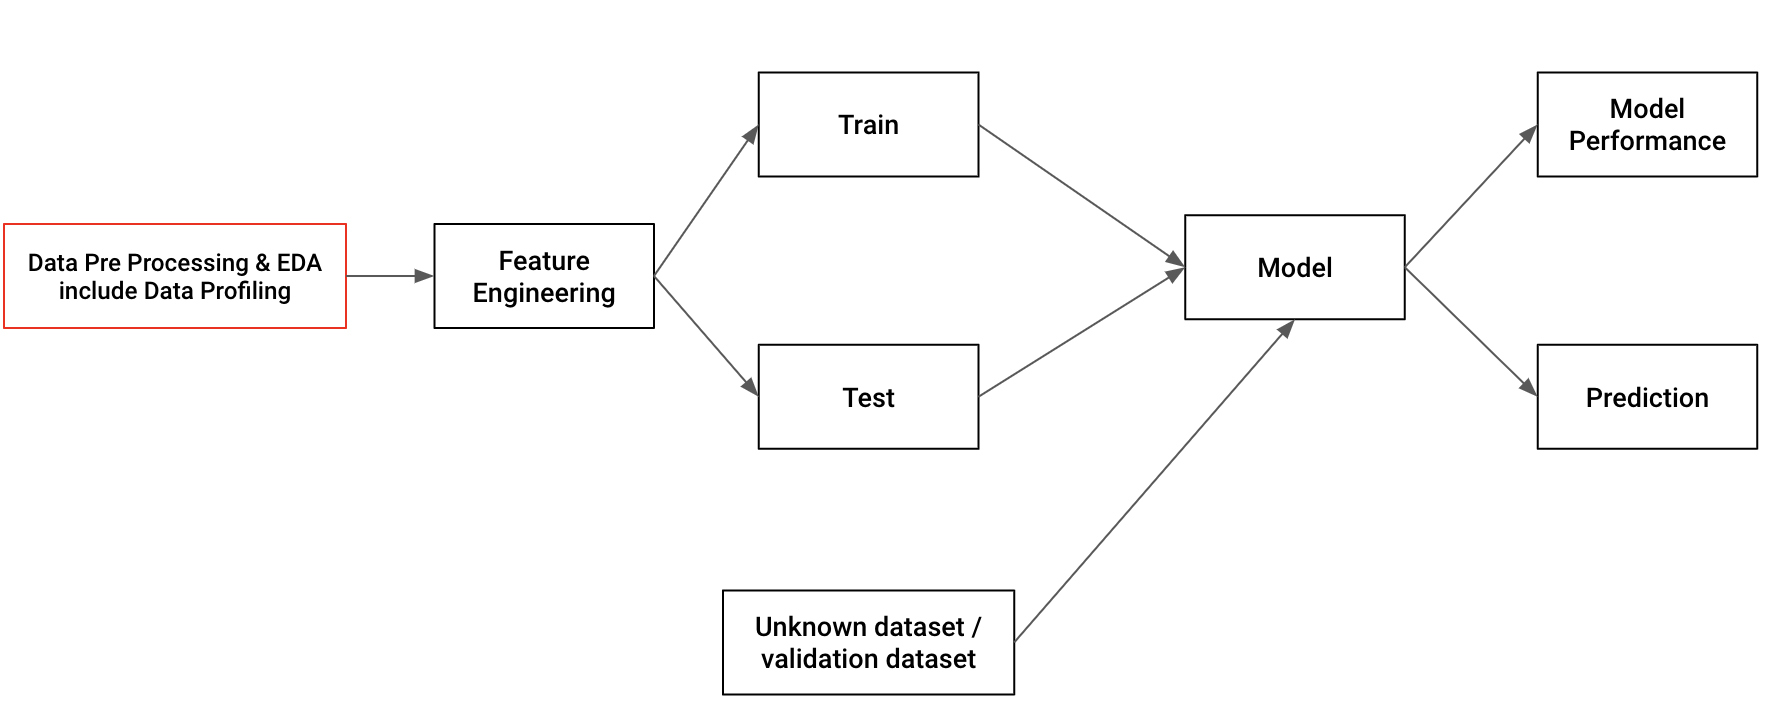

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
import matplotlib.pyplot as plt


retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
retail_raw

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0


#**DESCRIPTIVE STATISTIC**

In [ ]:
#Tipe data dataframe
print(retail_raw.dtypes,'\n')
#Length
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

#Count
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)

#Missing Value
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Presentase missing value kolom city:', pct_of_missing_values_city)

#Maximum, Minmum, Mean, Median, Modus, Standar Deviasi
print('\nKolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

#Quantile (Kuratil, Desil, Presentil)
print('\nKolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

#Korelasi
print('\nKorelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

#Untuk melakukan semua yang d atas bisa dilakukan dengan cara berikut
# pandas_profiling.ProfileReport(retail_raw)
#Hasilnya: https://storage.googleapis.com/dqlab-image/html/Retail%20Profiling.html

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object 

Length kolom city: 5000
Count kolom count_city: 4984
Presentase missing value kolom city: 0.3%

Kolom quantity
Minimum value:  1.0
Maximum value:  720.0
Mean value:  11.423987164059366
Mode value:  0    1.0
dtype: float64
Median value:  5.0
Standard Deviation value:  29.442025010811317

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


#**DATA CLEANSING**

* Proses mengidentifikasi bagian data yang salah, tidak lengkap, tidak akurat, tidak relevan atau hilang dan kemudian memodifikasi, mengganti atau menghapusnya sesuai dengan kebutuhan. Data Cleansing dianggap sebagai elemen dasar dari Data Science.

* Data cleansing dari treatment terhadap missing data, treatment outliers, sampai deduplikasi data.

**MISSING VALUES**

Cara treatment terhadap missing-value antara lain:

* Leave as it is (dibiarkan)
* Filling the missing value (imputasi)
* Drop them (hapus row yang mengandung missing value)
   * Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan mean, modus ataupun menggunakan predictive modelling.  


In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


**OUTLIERS**

Cara treatment terhadap outliers antara lain:

* Remove the outliers (dibuang)
* Filling the missing value (imputasi)
* Capping
* Prediction

In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


**DEDUPLIKASI DATA**

* Untuk melihat data duplikat : nama_dataframe.duplicated(subset=None)
* Untuk drop data duplikat : nama_dataframe.drop_duplicates()

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4692, 9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#**MINI PROJECT**

Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


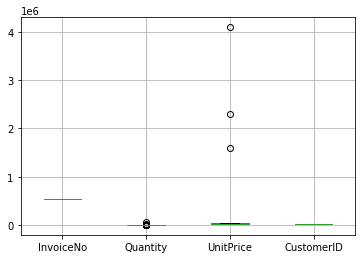

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

#Cek outlier dengan Boxplot
uncleaned_raw.boxplot()
plt.show()

In [ ]:
#check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
